In [15]:
import random
from brian2 import *
import matplotlib.pyplot as plt


# network parameters
N_E = 1000
gamma = 0.25
N_I = round(gamma * N_E)
N = N_E + N_I
epsilon = 0.1
C_E = epsilon * N_E
C_ext = C_E

# neuron parameters
tau = 10 * ms
theta = 1 * mV
V_r = 0 * mV
tau_rp = 2 * ms

# synapse parameters
J = 0.1 * mV
D = 1.5 * ms
nu_ext = 16 *Hz
# external stimulus
nu_thr = theta / (J * C_E * tau)

defaultclock.dt = 0.1 * ms

Poisson_NE = 1000
g = 3
neurons = NeuronGroup(N,
                          """
                          dv/dt = -v/tau : volt (unless refractory)
                          """,
                          threshold="v > theta",
                          reset="v = V_r",
                          refractory=tau_rp,
                          method="exact",
    )


neuron = NeuronGroup(1,
                          """
                          dv/dt = -v/tau : volt (unless refractory)
                          """,
                          threshold="v > theta",
                          reset="v = V_r",
                          refractory=tau_rp,
                          method="exact",
    )


exc_poisson_input = PoissonInput(
        target=neuron, target_var="v", N=N_E, rate=nu_ext, weight=J)

inh_poisson_input = PoissonInput(
        target=neuron, target_var="v", N=N_I, rate=nu_ext, weight=-g*J)



rmp_monitor = StateMonitor(neuron, 'v', record = 0)

run(1000*ms, report='text')






Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in < 1s


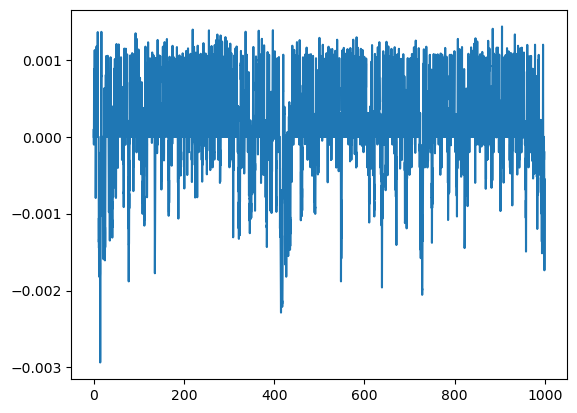

In [16]:
plot(rmp_monitor.t/ms, rmp_monitor.v[0])


In [41]:
a =(rmp_monitor.v[0]/mV)

In [42]:
len(a)

50000

In [43]:
a.mean()

-3.00375524078661